## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading the file 
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Finding total number of rows in dataframe
total_rows =  float(df.shape[0])
total_rows

294478.0

c. The number of unique users in the dataset.

In [4]:
#finding the unique users in dataframe
a = len(df['user_id'].unique())
a

290584

d. The proportion of users converted.

In [5]:
#Finding propotion of number of user who are converted
converted_users = float(df.query('converted == 1')['user_id'].nunique())
proportion = converted_users/total_rows
proportion

0.1194418598333322

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Finding number of user who are  assigned as treatment and new_page
df.query('(group == "treatment" & landing_page != "new_page") or (group != "treatment" & landing_page == "new_page")')['user_id'].count

<bound method Series.count of 22        767017
240       733976
308       857184
327       686623
357       856078
490       808613
685       666385
713       748761
776       820951
846       637639
850       793580
889       839954
988       698120
1037      880442
1106      817911
1198      646342
1354      735021
1376      844475
1474      678638
1551      838336
1706      916207
1762      690127
1877      717682
2023      937692
2214      649781
2233      869707
2422      853156
2689      793494
2745      872666
2759      639817
           ...  
292521    689329
292570    778969
292607    699462
292748    684361
292800    712112
292845    893018
292963    742202
292977    638460
293017    792268
293085    884635
293240    861420
293302    825937
293391    934444
293393    636565
293443    738761
293480    638376
293530    934040
293568    704024
293662    927109
293773    688144
293817    876037
293888    865405
293894    741581
293917    738357
293996    942612
294014    813406
2

f. Do any of the rows have missing values?

In [7]:
#finding if they are any null values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
#Finding duplicate values
df.duplicated().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#Creating a new dataframe by dropping group and landing_page are not assigned as treatment is not aligned with new_page or control is not aligned with old_page
df1 = df.drop(df.query('(group == "treatment" & landing_page != "new_page") or (group != "treatment" & landing_page == "new_page") or (group != "control" & landing_page == "old_page") or (group == "control" & landing_page != "old_page")').index)

In [10]:
df1.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df1[((df1['group'] == 'treatment') == (df1['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
#Unique users in new dataframe
df1['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#Finding duplicated user_id
df1[df1.duplicated(['user_id'],keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
#Getting information of repeated row
df1[df1['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#Dropping the duplicate user_id row
df1= df1.drop(df1[(df1.user_id==773192) & (df1['timestamp']=='2017-01-09 05:37:58.781806')].index)
df1[df1['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#Finding out the individual who are converting 
converted_users_new = float(df1.query('converted == 1')['user_id'].nunique())
proportion2 = converted_users_new/float(df1.shape[0])
proportion2

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#Finding out the individual who are converting whith group as control
converted_control2=float(df1.query('converted == 1 and group == "control"')['user_id'].nunique())
control =float(df1.query('group == "control"')['user_id'].nunique())
cp2 = converted_control2 /control
cp2

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
##Finding out the individual who are converting whith group as control
treatment_user = float(df1.query('converted ==1 and group == "treatment"')['user_id'].nunique())
total_treatment = float(df1.query('group == "treatment"')['user_id'].nunique())
tp2=treatment_user/total_treatment
tp2

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
#Finding totoal number of users whose landing_page is new_page
newpage = float(df1.query('landing_page == "new_page"')['user_id'].nunique())
pusers_newpage= newpage/float(df.shape[0])
pusers_newpage

0.4934494257635545

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

From the above results the probability of conversion is same for both control and treatment

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

pold - pnew <= 0
pold -pnew >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [39]:
pnew = df1.query('converted == 1')['user_id'].nunique()/df1['user_id'].nunique()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [40]:
pold = df1.query('converted == 1')['user_id'].nunique()/df1['user_id'].nunique()
pold

0.11959708724499628

c. What is $n_{new}$?

In [41]:
#computing no of unique new_page users using df1
nnew = df1.query('landing_page == "new_page"')['user_id'].nunique()
nnew

145310

d. What is $n_{old}$?

In [42]:
#computing no of unique old_page users using df1
nold = df1.query('landing_page == "old_page"')['user_id'].nunique()
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [43]:
#Storing all 1 and 0 of nnew in new_page_converted 
new_page_converted = np.random.choice([0,1],nnew, p=(pnew,1-pnew))
new_page_converted

array([1, 0, 0, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [44]:
#Storing all 1 and 0 of nnew in new_page_converted 

old_page_converted = np.random.choice([0,1],nold, p=(pold,1-pold))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [45]:
#Finding mean of new_page_converted
new_page_converted.mean()

0.87850113550340647

In [46]:
#Finding mean of old_page_converted
old_page_converted.mean()

0.8803227005520603

In [47]:
#Find Pnew-Pold
new_page_converted.mean()-old_page_converted.mean()

-0.0018215650486538282

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [48]:
#Looping for 10000 times,Pnew-Pold
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1],nnew, p=(pnew,1-pnew))
    old_page_converted = np.random.choice([0,1],nold, p=(pold,1-pold))
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

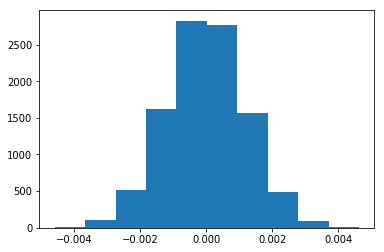

In [49]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [50]:
convert_new = df1.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old = df1.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()

# Compute actual converted rate
actual_cvt_new = float(convert_new)/ float(nnew) 
actual_cvt_old = float(convert_old)/ float(nold)

In [51]:
actual_cvt_new

0.11880806551510564

In [52]:
actual_cvt_old

0.1203863045004612

In [66]:
obv_diff = actual_cvt_new-actual_cvt_old


In [70]:
obv_diff

-0.0015782389853555567

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

From the computed values in part J, I feel both the conversion rates are same.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [62]:
import statsmodels.api as sm

convert_old,convert_new,nnew,nold

(17489, 17264, 145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [63]:
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [nnew, nold])

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [65]:
z_score,p_value

(1.2616957421858055, 0.20705828960655481)

 Both conversion rates are same.So findings in parts j and k are same 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logestic regression because response is categorial variable

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [54]:
#creating dummies for landing_page
df1 = pd.get_dummies(df1, columns=['landing_page'])


In [55]:
df1['ab_page'] = pd.get_dummies(df1['group'])['treatment']
df1['ab_page']

0         0
1         0
2         1
3         1
4         0
5         0
6         1
7         0
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        0
16        0
17        1
18        0
19        0
20        1
21        1
23        1
24        1
25        0
26        1
27        1
28        0
29        1
30        0
         ..
294448    1
294449    1
294450    1
294451    0
294452    0
294453    0
294454    1
294455    1
294456    1
294457    1
294458    1
294459    0
294460    1
294461    0
294462    1
294463    0
294464    0
294465    1
294466    0
294467    0
294468    1
294469    0
294470    0
294471    0
294472    1
294473    0
294474    0
294475    0
294476    0
294477    1
Name: ab_page, Length: 290584, dtype: uint8

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [56]:
#Performing Logistic regression 
import statsmodels.api as sm
df1['intercept'] = 1
newpage_log = sm.Logit(df1['converted'] ,df1[['intercept','ab_page']])
results = newpage_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        05:31:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [ ]:
p-value for the 0.19

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


The p-value associated with ab_page is 0.190. 

Part II assumes the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The factor that can be consider was timestamp.By adding timestamp variable it makes regression model more complex to interpretate model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [61]:
#reading  countries.CSV
countries = pd.read_csv('countries.csv')
countries.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [64]:
#merging countries to original data frame
df3= df1.merge(countries,on = 'user_id',how = 'left')
df3.head(5)

,user_id,timestamp,group,converted,landing_page_new_page,landing_page_old_page,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,0,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,0,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,1,0,1,0,1,US


In [67]:
#Creating dummies for country
df3[['CA','US','UK']] = pd.get_dummies(df3['country'])

In [69]:
#Finding the fit 
df3['intercept'] = 1
Log_c = sm.Logit(df3['converted'], df3[['intercept','landing_page_new_page','UK','US']])
results = Log_c.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        07:10:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -2.0300      0.027    -76.249      0.000      -2.082      -1.978
landing_page_new_page    -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK                        0.0408      0.027      1.516      0.130      -0.012       0.093
US                        0.0506      0.028      1.784      0.074      -0.005       0.106
=========================================================================================
"""

In [70]:
#Getting exponanial value of coefficient
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.0151130646157189, 1.0519020483004984, 1.0416437559600236)

In [72]:
df3['UK_new_page'] = df3['landing_page_new_page']* df3['UK']
df3['US_new_page'] = df3['landing_page_new_page']* df3['US']

In [73]:
logit4 = sm.Logit(df3['converted'], df3[['intercept','landing_page_new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 05 Nov 2018   Pseudo R-squ.:               3.482e-05
Time:                        07:15:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                -2.0040      0.036    -55.008      0.000      -2.075      -1.933
landing_page_new_page    -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page               0.0469      0.054      0.872      0.383      -0.059       0.152
US_new_page               0.0783      0.057      1.378      0.168      -0.033       0.190
UK                        0.0175      0.038      0.465      0.642      -0.056       0.091
US                        0.0118      0.040      0.296      0.767      -0.066       0.090
=========================================================================================
"""

In [74]:
np.exp(result4.params)


intercept                0.134794
landing_page_new_page    0.934776
UK_new_page              1.048001
US_new_page              1.081428
UK                       1.017682
US                       1.011854
dtype: float64

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

In [ ]:
refernce:https://github.com/Alicelibinguo/Analyzing-Website-Landing-Page-A-B-Test-Results-/blob/master/Analyze_ab_test_results_notebook.py